## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

## 2. Importing Data

In [2]:
test_tmp = pd.read_csv("SalaryData_Test.csv")
train_tmp = pd.read_csv("SalaryData_Train.csv")

In [3]:
test_tmp

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
train_tmp

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df_tmp= test_tmp.append(train_tmp)

In [6]:
test= test_tmp.copy()
train= train_tmp.copy()

In [7]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
str_c= ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [10]:
number= LabelEncoder()

In [11]:
for i in str_c:
    train[i]= number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

In [12]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [13]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [14]:
mapping= {' >50K': 1, ' <=50K': 2}

In [15]:
train= train.replace({'Salary': mapping})
test= test.replace({'Salary': mapping})

In [16]:
df= train.append(test) 

In [17]:
df1= df.copy()

In [18]:
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,2
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,2
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,2
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,2


In [19]:
print("No. of observations:{}\nNo. of features:{}".format(df1.shape[0],df1.shape[1]))

No. of observations:45221
No. of features:14


In [20]:
df1.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
df1.describe(include="all")

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,2.204507,10.313217,10.118463,2.585148,5.969572,1.412684,3.680281,0.675062,1101.454700,88.548617,40.938038,35.431503,1.752151
std,13.217981,0.958132,3.816992,2.552909,1.500460,4.026444,1.597242,0.832361,0.468357,7506.511295,404.838249,12.007640,5.931380,0.431769
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,2.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,2.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,2.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,2.000000


<AxesSubplot:>

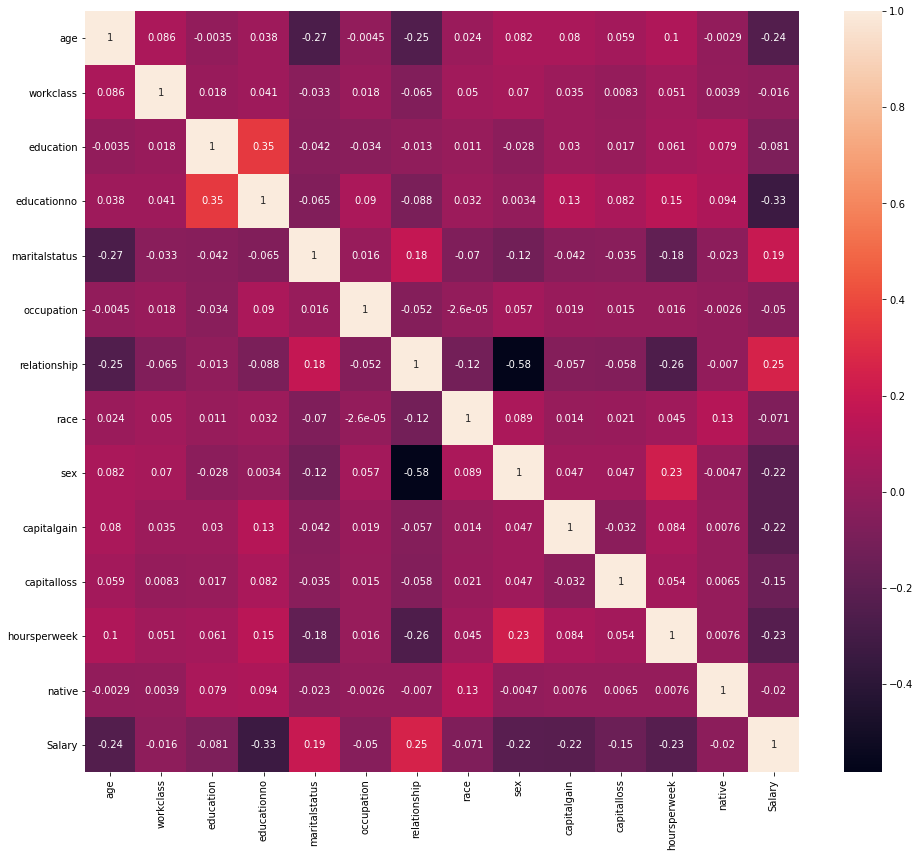

In [22]:
corr= df1.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr,annot=True)

Skew: -0.31062061074424
Kurtosis: 0.6350448194491634


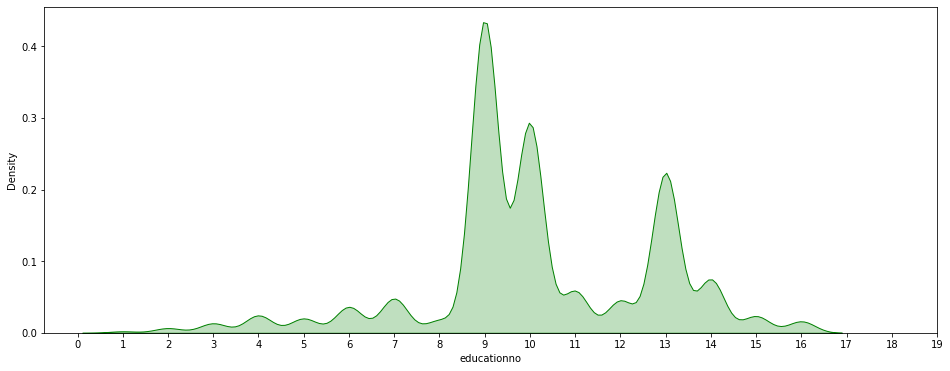

In [23]:
plt.figure(figsize=(16,6))
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))
ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

#### >> The Data is negatively skewed and has low kurtosis value
#### >> Most of people have eduction Number of years of education 8 - 1

In [24]:
dfa= df_tmp[df_tmp.columns[0:13]]
obj_colum= dfa.select_dtypes(include='object').columns.tolist()

<ipython-input-25-a1eea109f9c9>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)


ValueError: num must be 1 <= num <= 4, not 5

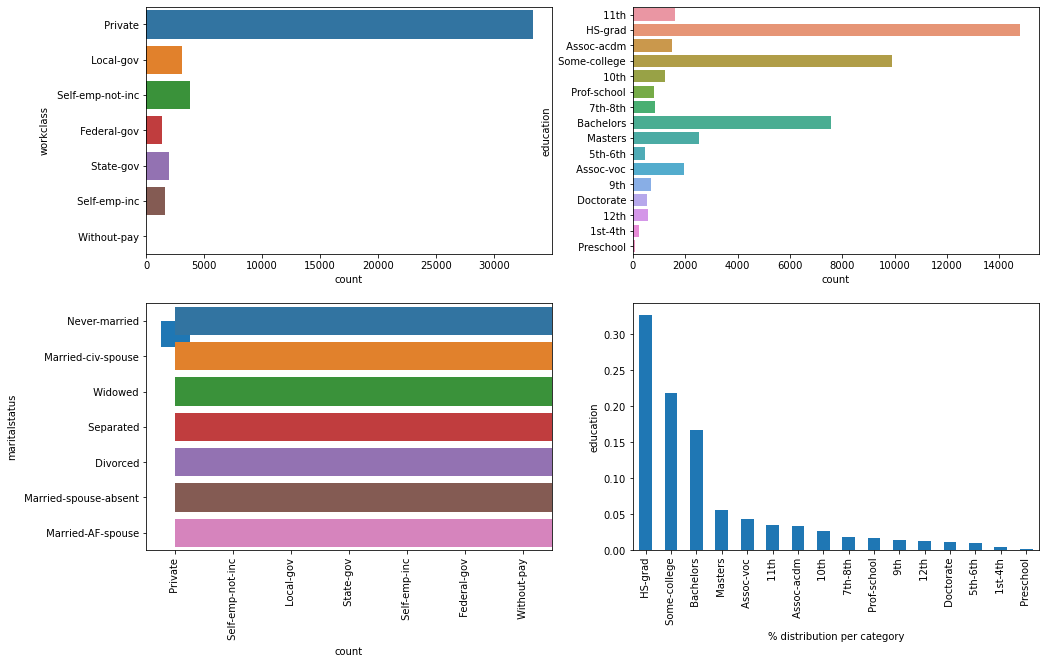

In [25]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df_tmp[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()    

#### >> Majority of the workclass is in Private Sector.
#### >> Also for education, majority of the people have HS graduation or some college degree.

In [26]:
num_columns= dfa.select_dtypes(exclude='object').columns.tolist()

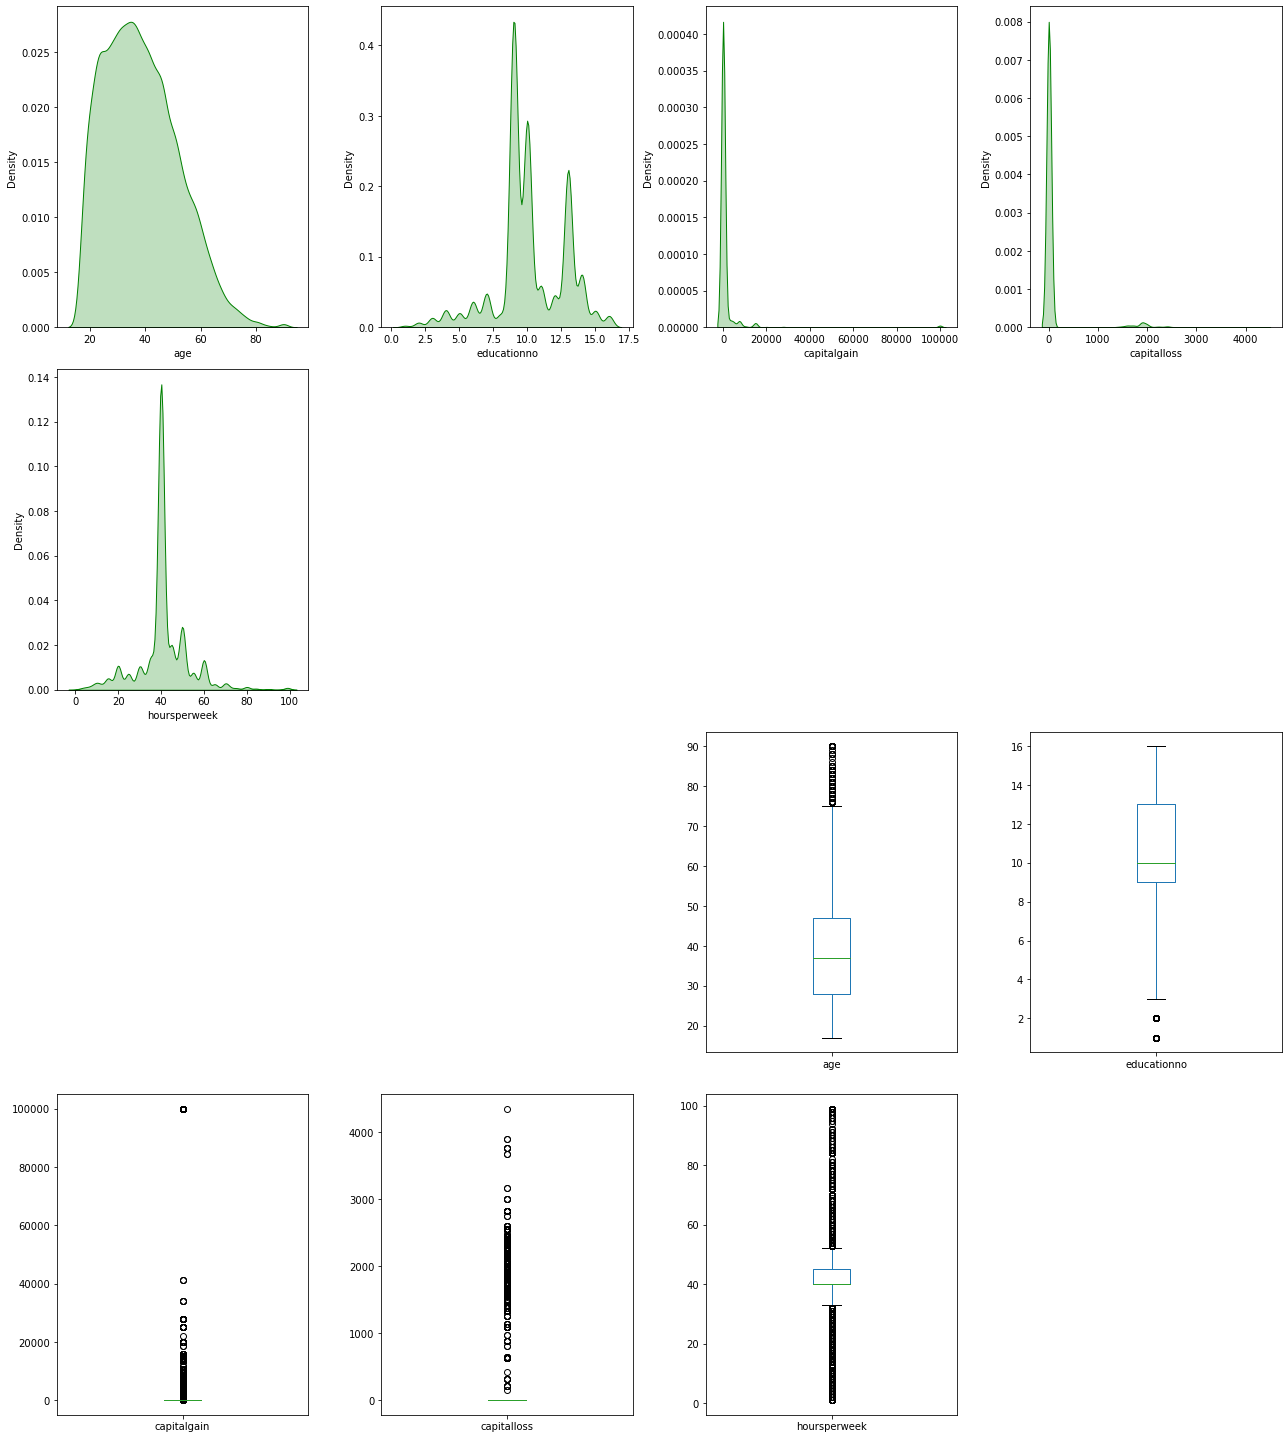

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.532784,-0.310621,11.788871,4.517536,0.340536
kurtosis,-0.155931,0.635045,150.147899,19.376085,3.201287


In [27]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data= df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

## 3. Naive Bayes

In [28]:
x_train= train.iloc[:,0:13]
y_train= train.iloc[:,13]
x_test= test.iloc[:,0:13]
y_test= test.iloc[:,13]

### 3.1 GaussianNB

In [29]:
clsfrgnb= GaussianNB()

In [30]:
clsfrgnb.fit(x_train, y_train)

GaussianNB()

In [31]:
y_pred_gnb = clsfrgnb.predict(x_test)

In [32]:
confusion_matrix(y_test, y_pred_gnb)

array([[ 1209,  2491],
       [  601, 10759]], dtype=int64)

In [33]:
pd.crosstab(y_test.values.flatten(),clsfrgnb)

col_0,GaussianNB()
row_0,
1,3700
2,11360


In [34]:
print ("Accuracy",np.mean(y_pred_gnb==y_test.values.flatten()))

Accuracy 0.7946879150066402


### 3.2 MultinomialNB

In [35]:
clsfrmnb= MultinomialNB()

In [36]:
clsfrmnb.fit(x_train, y_train)

MultinomialNB()

In [37]:
y_pred_mnb= clsfrmnb.predict(x_test)

In [38]:
confusion_matrix(y_test, y_pred_mnb)

array([[  780,  2920],
       [  469, 10891]], dtype=int64)

In [39]:
pd.crosstab(y_test.values.flatten(),clsfrmnb)

col_0,MultinomialNB()
row_0,
1,3700
2,11360


In [40]:
print("Accuracy",np.mean(y_pred_mnb==y_test.values.flatten()))

Accuracy 0.7749667994687915


## 4 - Conclusion & Cross Validation
GaussianNB Model has a better Accuracy, Thus we will use GaussianNB Classifier
We will also cross validate the model with other classifiers to get better understanding of which classifier is best suited for our data

In [41]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [42]:
results= []
names= []
scoring= 'accuracy'

In [43]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Rumana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rumana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LR: 0.801167 (0.004812)
LDA: 0.810650 (0.008475)
KNN: 0.834455 (0.005149)
CART: 0.807599 (0.004893)
NB: 0.795498 (0.006570)


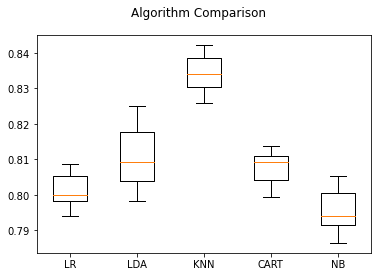

In [44]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### >> In comparision KNN has the best Accuracy